#8章 Kerasで画像（CIFAR-10）を判定するCNNを構築しよう #1

In [1]:
# GPUは多数の並列スレッドを同時に実行する。
# これらのスレッドの実行順序は、ハードウェアの特性やワークロードによって変動する可能性があり、完全に制御することが難しい
from tensorflow.keras import utils
utils.set_random_seed(0)

In [2]:
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
display(data)

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
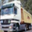

In [6]:
x_train[1]

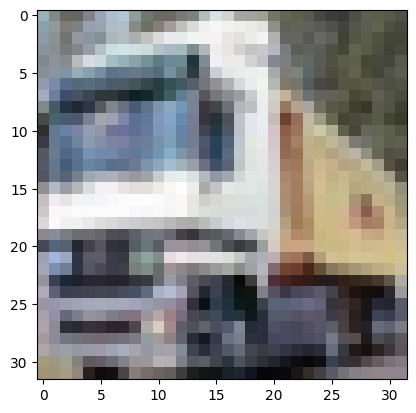

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [8]:
y_train[1]

array([9], dtype=uint8)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [11]:
# VGGNet
# 2014年にオックスフォード大学の研究チームによって開発された畳み込みニューラルネットワーク（CNN）のアーキテクチャ。
# 単純な構造：VGGNetの最大の特徴は、その単純さにある。3x3の小さな畳み込みフィルタを重ねて使用し、複雑な特徴を捉える。これは、小さなレンズを何枚も重ねて望遠鏡を作るようなもの
# 畳み込み層と最大プーリング層：
# 畳み込み層：画像の特徴を抽出する。小さな領域（3x3ピクセル）ずつ見ていき、エッジや形などの特徴を検出する。
# 最大プーリング層：特徴マップのサイズを縮小し、重要な情報を保持しながら計算量を減らす
# 全結合層：
# ネットワークの最後に3つの全結合層があり、抽出された特徴を使って最終的な分類を行う。
# 活性化関数：
# 各畳み込み層の後にReLU（Rectified Linear Unit）活性化関数を使用し、非線形性を導入する。これにより、ネットワークは複雑なパターンを学習できる。


# 9章 Kerasで画像（CIFAR-10）を判定するCNNを構築しよう #2

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [13]:
model = Sequential()

In [14]:
# 64: 畳み込み層の深さ
# 3,3: フィルタサイズ
# same: 入力と出力の空間的な寸法が同じになるようにパディング（余白）が追加される。'same'パディングは、入力の周りにゼロを追加して、出力サイズを入力サイズと同じに保つ。出力の空間的次元（幅と高さ）は、入力と同じとなる。
# Conv2D(64, (3, 3), ...)の「64」は、64個の異なるフィルタを使用して64個の特徴マップを生成することを意味する。各フィルタは異なるパターンを検出するように学習し、結果として64種類の異なる特徴（エッジ、テクスチャ、形状など）を抽出する。
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# pool_size=(2, 2) の意味：これは、2x2のウィンドウ（プーリング領域）を使用することを指定します。
model.add(MaxPooling2D(pool_size=(2, 2)))


In [16]:
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
# conv2d
##バッチサイズ:
## Kerasでは、入力データのバッチサイズはモデル構築時には決定されません。したがって、None になります
## パディングが'same'の場合:出力の空間的次元（幅と高さ）は、入力と同じです。従って、出力の幅と高さも32
## 出力チャンネル数:畳み込みレイヤーが64のフィルターを持つため、出力のチャンネル数は64
##  (カーネルの高さ)×(カーネルの幅)×(入力チャンネル数)×(出力フィルター数)+(出力フィルター数のバイアス)
## ここで(3×3×3×64)+64=1,728+64=1,792
## したがって、合計パラメータ数は 1,792 です。
# max_pooling
## 入力の空間的な次元が (32, 32) なので、出力の空間的な次元は (32 / 2, 32 / 2)、すなわち (16, 16)
## MaxPoolingレイヤーは空間的な次元を縮小するが、チャンネル数には影響しない。したがって、チャンネル数は64のまま
## MaxPoolingレイヤーには学習可能なパラメータがないため、パラメータ数は0
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         983,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,069,822 (4.08 MB)

 Trainable params: 1,069,822 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

* バッチサイズとエポック数の関係性

    バッチサイズとエポック数は独立して設定されるものですが、両者の組み合わせによって訓練プロセスの効率性と結果が大きく影響されます。

* 具体的な関係性

    1エポックの計算:
    1エポックは、すべてのトレーニングサンプルが一度訓練に使用されることを意味します。したがって、エポック数が多いほど、データ全体を繰り返し使用します。
    バッチサイズがnで、トレーニングデータのサンプル数がNの場合、1エポックで必要なバッチ数は
    ⌈𝑁⌉n⌉ となります。
    例
    データセット: 10,000サンプル
    バッチサイズ: 100
    エポック数: 10
    この場合：
    1エポックには
    10000/100    ​
    =100 バッチが含まれます。
    10エポックでは、モデルは合計
    100×10=1000 バッチを処理します。

* 実際の訓練プロセス

    モデルの訓練において、バッチサイズとエポック数は、トレードオフとバランスを考慮しながら設定する必要があります。大きすぎるバッチサイズはメモリの制約を超える可能性があり、小さすぎるバッチサイズは訓練が遅くなるかもしれません。同様に、エポック数が少なすぎるとモデルが十分に学習しない可能性があり、多すぎると過学習のリスクがあります。

* 最適化のための実験

    適切なバッチサイズとエポック数を見つけるためには、異なる値を試してみて、モデルのパフォーマンス（例えば、訓練誤差や検証誤差）を観察することが重要です。交差検証や早期停止（early stopping）などの技術を用いると、過学習を防ぎながら最適なハイパーパラメータを見つけやすくなります。

In [20]:
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.3515 - loss: 1.7623 - val_accuracy: 0.5804 - val_loss: 1.2166
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5945 - loss: 1.1404 - val_accuracy: 0.6602 - val_loss: 0.9848
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6612 - loss: 0.9560 - val_accuracy: 0.6740 - val_loss: 0.9362
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6978 - loss: 0.8551 - val_accuracy: 0.6896 - val_loss: 0.9001
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7294 - loss: 0.7676 - val_accuracy: 0.7010 - val_loss: 0.8834
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7537 - loss: 0.6962 - val_accuracy: 0.7072 - val_loss: 0.8836
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7828 - loss: 0.6276 - val_accuracy: 0.7014 - val_loss: 0.9361
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8026 - loss: 0.5633 - val_accuracy

In [21]:
import pandas as pd
df = pd.DataFrame(history.history)


<Axes: >

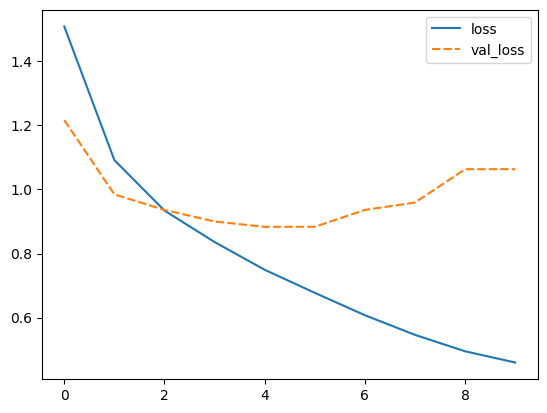

In [22]:
import seaborn as sns
sns.lineplot(data=df[['loss', 'val_loss']])


<Axes: >

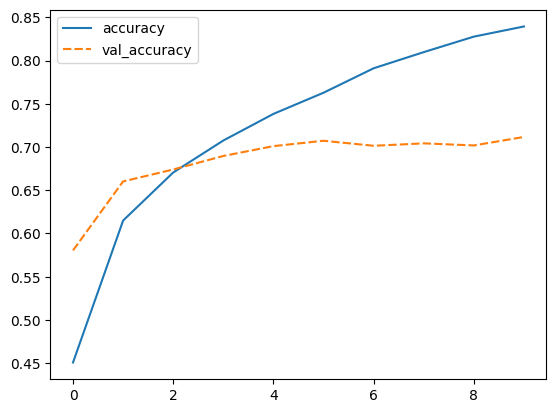

In [23]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])


In [24]:
# 乱数の固定
utils.set_random_seed(0)

# モデル定義
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 誤差関数、最適化手法、評価関数の設定
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習
model.fit(x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3574 - loss: 1.7550 - val_accuracy: 0.5678 - val_loss: 1.2115
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5887 - loss: 1.1530 - val_accuracy: 0.6596 - val_loss: 0.9810
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6574 - loss: 0.9698 - val_accuracy: 0.6872 - val_loss: 0.9239
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7006 - loss: 0.8582 - val_accuracy: 0.6972 - val_loss: 0.8987
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7321 - loss: 0.7693 - val_accuracy: 0.6978 - val_loss: 0.9112


In [25]:
model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6906 - loss: 0.9215


[0.9288908243179321, 0.6876000165939331]

In [26]:
# predictは省略